# Os átomos da computação

## Introdução

Programar um computador quântico agora é algo que qualquer um pode fazer no conforto de sua própria casa. Mas o que criar? Afinal, o que é um programa quântico? Na verdade, o que é um computador quântico?

Essas perguntas podem ser respondidas fazendo comparações com computadores digitais tradicionais. Infelizmente, a maioria das pessoas também não entende como os computadores digitais tradicionais funcionam. Nesta página, veremos os princípios básicos por trás desses dispositivos tradicionais e, para nos ajudar a fazer a transição para a computação quântica mais tarde, faremos isso usando as mesmas ferramentas que usaremos com computadores quânticos.

## Divisão de informaçãos em bits

A primeira coisa que precisamos saber é a idéia de *bits* . Estes são projetados para ser o alfabeto mais simples do mundo. Com apenas dois símbolos, 0 e 1, podemos representar qualquer informação.

Um exemplo são os números. Você provavelmente está acostumado a representar um número por meio de uma [string](gloss:string) de dez dígitos 0, 1, 2, 3, 4, 5, 6, 7, 8 e 9. Nessa sequência de dígitos, cada dígito representa quantas vezes o número contém uma certa [potência](gloss:power) de dez. Por exemplo, quando escrevemos 213, queremos dizer:

$$ 200+10+3 $$

ou, expresso de uma forma que enfatiza as potências de dez

$$ (2×10^2)+(1×10^1)+(3×10^0) $$

Embora geralmente usemos esse sistema com base no número 10, podemos facilmente usar um com base em qualquer outro número. O sistema de numeração binário, por exemplo, é baseado no número dois. Isso significa usar os dois caracteres 0 e 1 para expressar números como múltiplos de potências de dois. Por exemplo, 213 se torna 11010101, pois:

$$ \begin{aligned} 213 = &amp; \phantom{+}(1×2^7)+(1×2^6)+(0×2^5)\ &amp; +(1×2^4)+(0×2^3)+(1×2^2)\ &amp; +(0×2^1)+(1×2^0) \ \end{aligned} $$

Neste estamos expressando números como múltiplos de 2, 4, 8, 16, 32, etc. em vez de 10, 100, 1000, etc.

<!-- ::: q-block.binary -->

### Tente

```
q-binary
```

<!-- ::: -->

 

Essas strings de bits, conhecidas como strings binárias, podem ser usadas para representar mais do que apenas números. Por exemplo, existe uma maneira de representar qualquer texto usando bits. Para qualquer letra, número ou sinal de pontuação que você deseja usar, você pode encontrar uma string correspondente de no máximo oito bits usando [esta tabela](https://www.ibm.com/docs/en/aix/7.2?topic=adapters-ascii-decimal-hexadecimal-octal-binary-conversion-table) . Embora isto seja bastante arbitrário, este é um padrão amplamente aceito. Na verdade, é o que foi usado para transmitir este artigo para você pela internet.

É assim que todas as informações são representadas em computadores convencionais. Sejam números, letras, imagens ou sons, tudo existe na forma de strings binárias.

Como nossos computadores digitais padrões, os computadores quânticos são baseados nessa mesma ideia básica. A principal diferença é que eles usam *qubits,* uma extensão do bit para [a mecânica quântica](gloss:quantum-mechanics) . No restante deste livro, exploraremos o que são os qubits, o que eles podem fazer e como o fazem. Nesta seção, no entanto, não estamos falando sobre quântica. Então, nós apenas usamos qubits como se fossem bits.

<!-- ::: q-block.exercise -->

### Questionário rápido

<!-- ::: q-quiz(goal="intro-aoc-1") -->

<!-- ::: .question -->

Se você tiver $n$ bits, quantos números diferentes você poderia escrever?

<!-- ::: -->

<!-- ::: .option -->

1. $n$

<!-- ::: -->

<!-- ::: .option -->

1. $n^2$

<!-- ::: -->

<!-- ::: .option(correct) -->

1. $2^n$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Diagramas de circuito

Vimos na última página que uma computação pega alguns dados de entrada e realiza operações neles para produzir alguns dados de saída. Com os computadores quânticos que aprenderemos neste livro, esses dados sempre estarão na forma de bits. Agora que sabemos o que são bits, vamos ver como podemos manipulá-los para transformar as entradas que temos nas saídas que precisamos.

Muitas vezes é útil representar esse processo em um diagrama conhecido como *diagrama de circuito* . Esses diagramas têm entradas à esquerda, saídas à direita e operações representadas por símbolos arcanos no meio. Essas operações são chamadas de 'portas', principalmente por razões históricas. Aqui está um exemplo da aparência de um circuito para computadores padrões baseados em bits. Não se espera que você entenda o que ele faz. Deve simplesmente dar uma ideia de como são esses circuitos.

![exemplo de um diagrama de circuito clássico](images/aoc/logic_gates.png)

Para computadores quânticos, usamos a mesma ideia básica, mas temos convenções diferentes sobre como representar entradas, saídas e os símbolos usados para operações. Aqui está o “circuito quântico” que representa o mesmo processo acima.

![exemplo de um diagrama de circuito quântico](images/aoc/quantum_circuit.png)

No restante desta seção, explicaremos como construir circuitos quânticos. No final, você saberá como criar o circuito acima, o que ele faz e por que é útil.

## Criando circuitos com o Qiskit

Para criar um circuito quântico, importaremos a classe <code>QuantumCircuit</code> e criaremos um novo objeto <code>QuantumCircuit</code> .

<!-- ::: q-block.reminder -->

### Lembrete

<details>
    <summary>Noções básicas de Python (o que é tudo isso sobre classes e objetos?)</summary>
</details>

Sabemos que podemos descrever todas as informações usando um monte de bits, que é como os computadores armazenam e processam tudo, incluindo circuitos quânticos! Mas é difícil para nós, humanos, pensar em como fazemos isso e como manipulamos esses bits para representar os circuitos que queremos.

A classe <code>QuantumCircuit</code> é um conjunto de instruções para representar circuitos quânticos como bits. A linha <code>qc = QuantumCircuit(4, 2)</code> na célula abaixo é um construtor, que diz ao Python para separar alguns bits em seu computador que usaremos para representar um circuito quântico. Quando quisermos nos referir a esse circuito quântico (ou melhor, aos bits que representam esse circuito quântico) usaremos a variável ' <code>qc</code> '. Dizemos que ' <code>qc</code> ' se refere a um "objeto <code>QuantumCircuit</code> ".

Isso permite que nós, humanos, pensemos em circuitos quânticos em um nível alto e abstrato; podemos dizer coisas como “adicionar uma porta X” e o Qiskit cuidará do que precisamos fazer com os bits em nosso computador para refletir essa mudança.




<!-- ::: -->

Ao criar um circuito quântico, precisamos informar ao [Python](gloss:python) quantos qubits nosso circuito deve ter e, opcionalmente, também podemos informar quantos bits clássicos nosso circuito deve ter. Precisamos de bits clássicos para armazenar as medidas de nossos qubits, a razão para isso ficará clara mais adiante neste curso.

## Seu primeiro circuito quântico

Em um circuito, normalmente precisamos fazer três tarefas: primeiro, codificar a entrada, depois fazer alguns cálculos reais e, finalmente, extrair uma saída. Para o seu primeiro circuito quântico, vamos nos concentrar no último desses trabalhos. Começamos criando um circuito quântico com 3 qubits e 3 saídas.

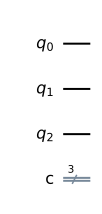

In [1]:
from qiskit import QuantumCircuit
# Crie um circuito quântico com 3 qubits e 3 bits clássicos
# (explicaremos por que precisamos dos bits clássicos mais tarde)
qc = QuantumCircuit(3, 3)
qc.draw() # retorna um desenho do circuito

Finalmente o método <code>qc.draw()</code> cria um desenho do circuito para nós. Os Jupyter Notebooks avaliam a última linha de uma célula de código e a exibem abaixo da célula. Como <code>qc.draw()</code> [retorna](gloss:return) um desenho, é isso que estamos vendo no código. Ainda não há portas em nosso circuito, então vemos apenas algumas linhas horizontais.

<!-- ::: q-block.reminder -->

### Lembrete

<details><summary>Noções básicas de Python (o que é um método?)</summary> A classe <code>QuantumCircuit</code> é um conjunto de instruções para representar circuitos quânticos como bits, mas quando queremos alterar um desses circuitos, também precisamos saber como alterar os bits de acordo. Em [Python](gloss:python), os objetos vêm com 'métodos', que são conjuntos de instruções para fazer algo com aquele objeto. Na célula acima, o método <code>.draw()</code> examina o circuito que criamos e produz um desenho legível desse circuito.</details>




<!-- ::: -->

Em seguida, precisamos de uma maneira de dizer ao nosso computador quântico para medir nossos qubits e registrar os resultados. Para fazer isso, adicionamos uma operação de "medida" ao nosso circuito quântico. Podemos fazer isso com o método `QuantumCircuit` `.measure()` do QuantumCircuit .

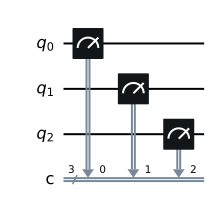

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# mede qubits 0, 1 e 2 para bits clássicos 0, 1 e 2 respectivamente
qc.measure([0,1,2], [0,1,2])
qc.draw()

A seguir, vamos ver quais seriam os resultados da execução desse circuito. Para fazer isso, usaremos um simulador quântico, que é um computador padrão que calcula o que um computador quântico ideal faria. Como a simulação de um computador quântico é considerada difícil para computadores clássicos (os melhores algoritmos que temos crescem exponencialmente com o número de qubits), essas simulações só são possíveis para circuitos com pequenos números de qubits (até ~30 qubits) ou certos tipos de circuitos para os quais podemos usar alguns truques para acelerar a simulação. Os simuladores são ferramentas muito úteis para projetar circuitos quânticos menores.

Vamos importar o simulador do Qiskit (chamado Aer), e fazer um novo objeto simulador.

In [3]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() # cria um novo objeto simulador

Para fazer a simulação, podemos usar o método <code>.run()</code> dos simuladores. Isso retorna um "job", que contém informações sobre o experimento, por exemplo, se o experimento está em execução ou concluído, em qual back-end executamos o experimento e, o mais importante para nós, quais são os resultados do experimento!

Para obter os resultados do trabalho, usamos o método de results, e a maneira mais popular de visualizar os resultados é como um dicionário de "contagens".

In [4]:
job = sim.run(qc) # executa o experimento
result = job.result() # obtém os resultados
result.get_counts() # interpreta os resultados como um dicionário de "contagens"

{'000': 1024}

As chaves no dicionário de contagem são strings de bits e os valores são o número de vezes que a string de bits foi medida. Computadores quânticos podem ter aleatoriedade em seus resultados, então é comum repetir o circuito algumas vezes. Este circuito foi repetido 1024 vezes, que é o número padrão de vezes para repetir um circuito no Qiskit. Por convenção, os qubits sempre começam no estado `0` , e como não estamos fazendo nada com eles antes da medição, os resultados são sempre `0` .

### Codificando uma entrada

Agora vamos ver como codificar uma string binária diferente como entrada. Para isso, precisamos do que é conhecido como uma porta NOT. Esta é a operação mais básica que você pode fazer em um computador. Ele simplesmente inverte o valor do bit: 0 se torna 1 e 1 se torna 0. Para qubits, usamos uma porta conhecido como *porta X* para isso.

Abaixo, criaremos um novo circuito dedicado ao trabalho de codificação:

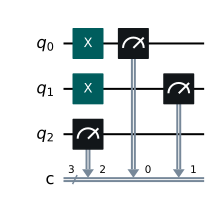

In [5]:
# Crie um circuito quântico com 3 qubits e 3 bits clássicos:
qc = QuantumCircuit(3, 3)
qc.x([0,1]) # Executa X-gates nos qubits 0 e 1
qc.measure([0,1,2], [0,1,2])
qc.draw() # retorna um desenho do circuito

E vamos simular nosso circuito para ver os resultados:

In [6]:
job = sim.run(qc) # executa o experimento
result = job.result() # obtém os resultados
result.get_counts() # interpreta os resultados como um dicionário de "contagens"

{'011': 1024}

<!-- ::: q-block.exercise -->

### Questionário rápido

<!-- ::: q-quiz(goal="intro-aoc-2") -->

<!-- ::: .question -->

Qual é o número binário `011` em decimal?

<!-- ::: -->

<!-- ::: .option -->

1. 5

<!-- ::: -->

<!-- ::: .option -->

1. 2

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 3

<!-- ::: -->

<!-- ::: -->

Modifique o código acima para criar um circuito quântico que codifique os números 6 e 4. Os resultados são os esperados?

<!-- ::: -->

Agora sabemos como codificar informações em um computador. O próximo passo é processá-la: pegar uma entrada que codificamos e transformá-la em uma saída que nos diga algo novo.

## Criando um circuito somador

### Lembrando como somar

Para olhar para transformar entradas em saídas, precisamos de um problema para resolver. Vamos fazer algumas contas básicas. Na escola primária, você aprendeu como pegar grandes problemas matemáticos e dividi-los em partes gerenciáveis. Por exemplo, como você resolveria esse problema de adição?

<!-- ::: q-block -->

### Lembrando como somar

<!-- ::: q-carousel -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/0/0.svg)

Como podemos resolver um problema como este? Clique neste carrossel para descobrir.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/0/1.svg)

Uma maneira é fazê-lo dígito por dígito, da direita para a esquerda. Então começamos com 3+4.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/0/2.svg)

E então 1+5.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/0/3.svg)

Depois 2+8.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/0/4.svg)

Finalmente temos 9+1+1, e obtemos nossa resposta.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Isso pode ser apenas uma simples adição, mas demonstra os princípios por trás de todos os algoritmos. Quer o algoritmo seja projetado para resolver problemas matemáticos ou processar texto ou imagens, sempre dividimos grandes tarefas em etapas pequenas e simples.

Para rodar em um computador, os algoritmos precisam ser compilados nos menores e mais simples passos possíveis. Para ver como eles se parecem, vamos fazer o problema de adição acima novamente, mas em binário.

<!-- ::: q-block -->

### Somando números binários

<!-- ::: q-carousel -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/1/0.svg)

Observe que o segundo número tem um monte de 0s extras à esquerda. Isso serve apenas para fazer as duas strings terem o mesmo comprimento.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/1/1.svg)

Nossa primeira tarefa é fazer o 1+0 para a coluna da direita. Em binário, como em qualquer sistema de numeração, a resposta é 1.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/1/2.svg)

Obtemos o mesmo resultado para o 0+1 da segunda coluna.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/1/3.svg)

Em seguida, temos 1+1. Como você certamente saberá, 1+1=2. Em binário, o número 2 é escrito 10 e, portanto, requer dois bits. Isso significa que precisamos carregar o 1, assim como faríamos para o número 10 em decimal. A próxima coluna agora exige que calculemos 1+1+1. Isso significa somar três números juntos, então as coisas estão ficando complicadas para o nosso computador.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/1/4.svg)

Mas ainda podemos compilá-lo para operações mais simples e fazê-lo de uma maneira que exija apenas que adicionemos dois bits. Para isso, podemos começar com apenas os dois primeiros 1s.

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/1/5.svg)

Agora precisamos adicionar este 10 ao 1 final, o que pode ser feito usando nosso método usual de percorrer as colunas. A resposta final é 11 (também conhecido como 3).

<!-- ::: -->

<!-- ::: div -->

![imagem de adição](images/aoc/carousel/1/6.svg)

Agora podemos voltar ao resto do problema. Com a resposta de 11, temos que carregar outro bit. Então agora temos mais 1+1+1 para fazer. Mas já sabemos como fazer isso, então não é grande coisa.

<!-- ::: -->

<!-- ::: div -->

Na verdade, tudo o que resta até agora é algo que já sabemos fazer. Isso ocorre porque, se você dividir tudo em apenas dois bits, haverá apenas quatro coisas possíveis que você precisará calcular. Aqui estão as quatro somas básicas (escreveremos todas as respostas com dois bits para ser consistente):

![imagem de adição](images/aoc/carousel/1/7.svg)

Isso é chamado de meio somador. Se nosso computador puder implementar isso, e se puder encadear muitos deles, ele poderá adicionar qualquer coisa.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

### Adicionando com circuitos quânticos

Vamos fazer nosso próprio meio somador a partir de um circuito quântico. Isso incluirá uma parte do circuito que codifica a entrada, uma parte que executa o algoritmo e uma parte que extrai o resultado. A primeira parte precisará ser alterada sempre que quisermos usar uma nova entrada, mas o restante permanecerá sempre o mesmo.

![esboço do nosso circuito somador](images/aoc/half-adder.svg)

Os dois bits que queremos somar são codificados nos qubits 0 e 1. O exemplo acima codifica um 1 em ambos os qubits e, portanto, procura encontrar a solução de 1+1. O resultado será uma string de dois bits, que leremos dos qubits 2 e 3. Tudo o que resta é preencher o programa real, que fica no espaço em branco no meio.

As linhas tracejadas na imagem são apenas para distinguir as diferentes partes do circuito (embora possam ter usos mais interessantes também)

As operações básicas da computação são conhecidas como portas lógicas. Já usamos a porta NOT, mas isso não é suficiente para fazer nosso meio somador. Só poderíamos usá-lo para escrever manualmente as respostas. Como queremos que o computador faça a computação real para nós, precisaremos de algumas portas mais poderosas.

Para ver o que precisamos, vamos dar outra olhada no que nosso meio somador precisa fazer.

![operações necessárias de um meio somador](images/aoc/half_adder_reqs.svg)

O bit mais à direita em todas essas quatro respostas é completamente determinado se os dois bits que estamos adicionando são iguais ou diferentes. Assim, para 0+0 e 1+1, onde os dois bits são iguais, o bit mais à direita da resposta é 0. Para 0+1 e 1+0, onde estamos adicionando valores de bits diferentes, o bit mais à direita é 1.

Para corrigir essa parte de nossa solução, precisamos de algo que possa descobrir se dois bits são diferentes ou não. Tradicionalmente, no estudo da computação digital, isso é chamado de porta XOR.

<table>
<thead>
  <tr>
    <th>Entrada 1</th>
    <th>Entrada 2</th>
    <th>Saída XOR</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
  </tr>
</tbody>
</table>

Em computadores quânticos, o trabalho da porta XOR é feito pelo 'porta controlled-NOT'. Como esse é um nome bastante longo, geralmente o chamamos de 'CNOT'. Nos diagramas de circuito, ele é desenhado como na imagem abaixo. Isso é aplicado a um par de qubits. Um atua como o qubit de controle (este é aquele com o pontinho). O outro atua como o qubit de alvo (com o grande círculo e a cruz - como uma marca de alvo).

![imagem da porta CNOT](images/aoc/cnot_xor.svg)

No Qiskit, podemos usar o método `.cx()` para adicionar um CNOT ao nosso circuito. Precisamos fornecer os índices dos dois qubits em que atua como argumentos. Aqui está um exemplo:

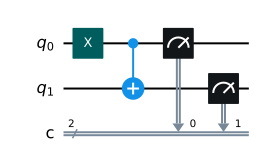

Result:  {'11': 1024}


In [7]:
# Crie um circuito quântico com 2 qubits e 2 bits clássicos
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1) # CNOT controlado pelo qubit 0 e direcionado ao qubit 1
qc.measure([0,1], [0,1])
display(qc.draw()) # exibe um desenho do circuito

job = sim.run(qc) # executa o experimento
result = job.result() # obtém os resultados
# interpreta os resultados como um dicionário de "contagens"
print("Resultado: ", result.get_counts())

Para nosso meio somador, não queremos substituir uma de nossas entradas. Em vez disso, queremos escrever o resultado em um par diferente de qubits. Para isso, podemos usar dois CNOTs e escrever a saída em um novo qubit que sabemos que estará no estado 0:

![diagrama de circuito do uso de dois CNOTs para criar uma porta XOR](images/aoc/xor.svg)

Estamos agora a meio caminho de um meio somador totalmente funcional. Sabemos como calcular o bit de saída mais à direita, então só precisamos descobrir como calcular o bit de saída à esquerda. Se você olhar novamente para as quatro somas possíveis, notará que há apenas um caso para o qual isso é 1 em vez de 0: 1+1=10. Isso acontece apenas quando os dois bits que estamos adicionando são 1.

![operações necessárias de um meio somador](images/aoc/half_adder_reqs.svg)

Para calcular essa parte da saída, podemos apenas fazer com que nosso computador verifique se ambas as entradas são 1. Se forem - e somente se forem - precisamos fazer um portão NOT no qubit 3. Isso o inverterá para o valor necessário de 1 apenas para este caso, dando-nos a saída que precisamos.

Para isso, precisamos de um novo portão: como um CNOT, mas controlado em dois qubits em vez de apenas um. Isso executará um NOT no qubit de alvo somente quando ambos os controles estiverem no estado 1. Essa nova porta é chamada de porta [Toffoli](gloss:toffoli) . Para aqueles que estão familiarizados com as portas lógicas booleanas, é basicamente uma porta AND.

![circuito quântico meio somador](images/aoc/ha_circuit.svg)

No Qiskit, podemos adicionar isso a um circuito usando o método `.ccx()` . Conseguimos! Um circuito que pode calcular o famoso problema matemático de 1+1.

<!-- ::: q-block.exercise -->

### Tente

Organize os blocos para criar o bloco de código que produz o circuito meio somador acima.

    q-drag-and-drop-code(goal="intro-aoc-3")
        .line from qiskit import QuantumCircuit
        .line qc = QuantumCircuit(4, 2)
        .line(group=0) qc.cx(0, 2)
        .line(group=0) qc.cx(1, 2)
        .line(group=0) qc.ccx(0, 1, 3) 
        .result-info

<!-- ::: -->

Excelente! Agora temos nosso meio somador, a próxima coisa a fazer é verificar se funciona. Para fazer isso, criaremos outro circuito que codifica alguma entrada, aplica o meio somador e extrai a saída. 

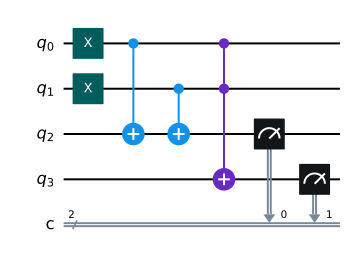

In [8]:
test_qc = QuantumCircuit(4, 2)

# Primeiro, nosso circuito deve codificar uma entrada (aqui '11')
test_qc.x(0)
test_qc.x(1)

# Em seguida, ele deve executar o circuito somador que criamos
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Por fim, mediremos os dois qubits inferiores para extrair a saída
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()

In [9]:
job = sim.run(test_qc) # executa o experimento
result = job.result() # obtém os resultados
result.get_counts() # interpreta os resultados como um dicionário de “contagens”

{'10': 1024}

Aqui podemos ver que o resultado '10' foi medido 1024 vezes, e não medimos nenhum outro resultado.

<!-- ::: q-block.exercise -->

### Exercício

Verifique se o circuito meio somador funciona para todas as quatro entradas possíveis.

[Experimente no IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

O meio somador contém tudo o que você precisa para adição. Com as portas NOT, CNOT e Toffoli, podemos criar programas que adicionam qualquer conjunto de números de qualquer tamanho.

Essas três portas são suficientes para fazer todo o resto da computação também. Na verdade, podemos até fazer sem o CNOT. Além disso, a porta NOT só é realmente necessária para criar bits com valor 1. A porta Toffoli é essencialmente o átomo da matemática. É o elemento mais simples, a partir do qual todas as outras técnicas de solução de problemas podem ser compiladas.